# NYCTaxi  Exploratory Data Analysis

This script is to show my EDA of the NYCtaxi training set and test set. I just follow a several top Kaggle kernels and create my own thoughts on feature selection. Here are the kernals I refer to:

https://www.kaggle.com/headsortails/nyc-taxi-eda-update-the-fast-the-curious

https://www.kaggle.com/gaborfodor/from-eda-to-the-top-lb-0-367

https://www.kaggle.com/maheshdadhich/strength-of-visualization-python-visuals-tutorial

https://www.kaggle.com/karelrv/nyct-from-a-to-z-with-xgboost-tutorial

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import great_circle
pd.set_option("max_colwidth",1000000)
pd.set_option('max_columns', 50)
import datetime

In [2]:
train=pd.read_csv("full_train_parsed.csv")
test=pd.read_csv("full_test_parsed.csv")

C:\Users\TANGP05\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 1. Training and test data

Plotting the pickup_longitude and pick_latitude for both train set and test set. We see both train set and test set have weird trips located in San Francisco and Atlantic Ocean. I prefer to keep all extreme trips in the model,  such as extreme high speed trip and picking up or dropping off in the ocean. We still need to predict some invalid trips in the test set. 

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 22 columns):
id                     1458644 non-null object
vendor_id              1458644 non-null int64
pickup_datetime        1458644 non-null object
dropoff_datetime       1458644 non-null object
passenger_count        1458644 non-null int64
pickup_longitude       1458644 non-null float64
pickup_latitude        1458644 non-null float64
dropoff_longitude      1458644 non-null float64
dropoff_latitude       1458644 non-null float64
store_and_fwd_flag     1458644 non-null object
trip_duration          1458644 non-null int64
pickup_date            1458644 non-null object
date                   1458644 non-null object
maximum temperature    1458644 non-null int64
minimum temperature    1458644 non-null int64
average temperature    1458644 non-null float64
precipitation          1458644 non-null object
snow fall              1458644 non-null object
snow depth             1458644 non-null o

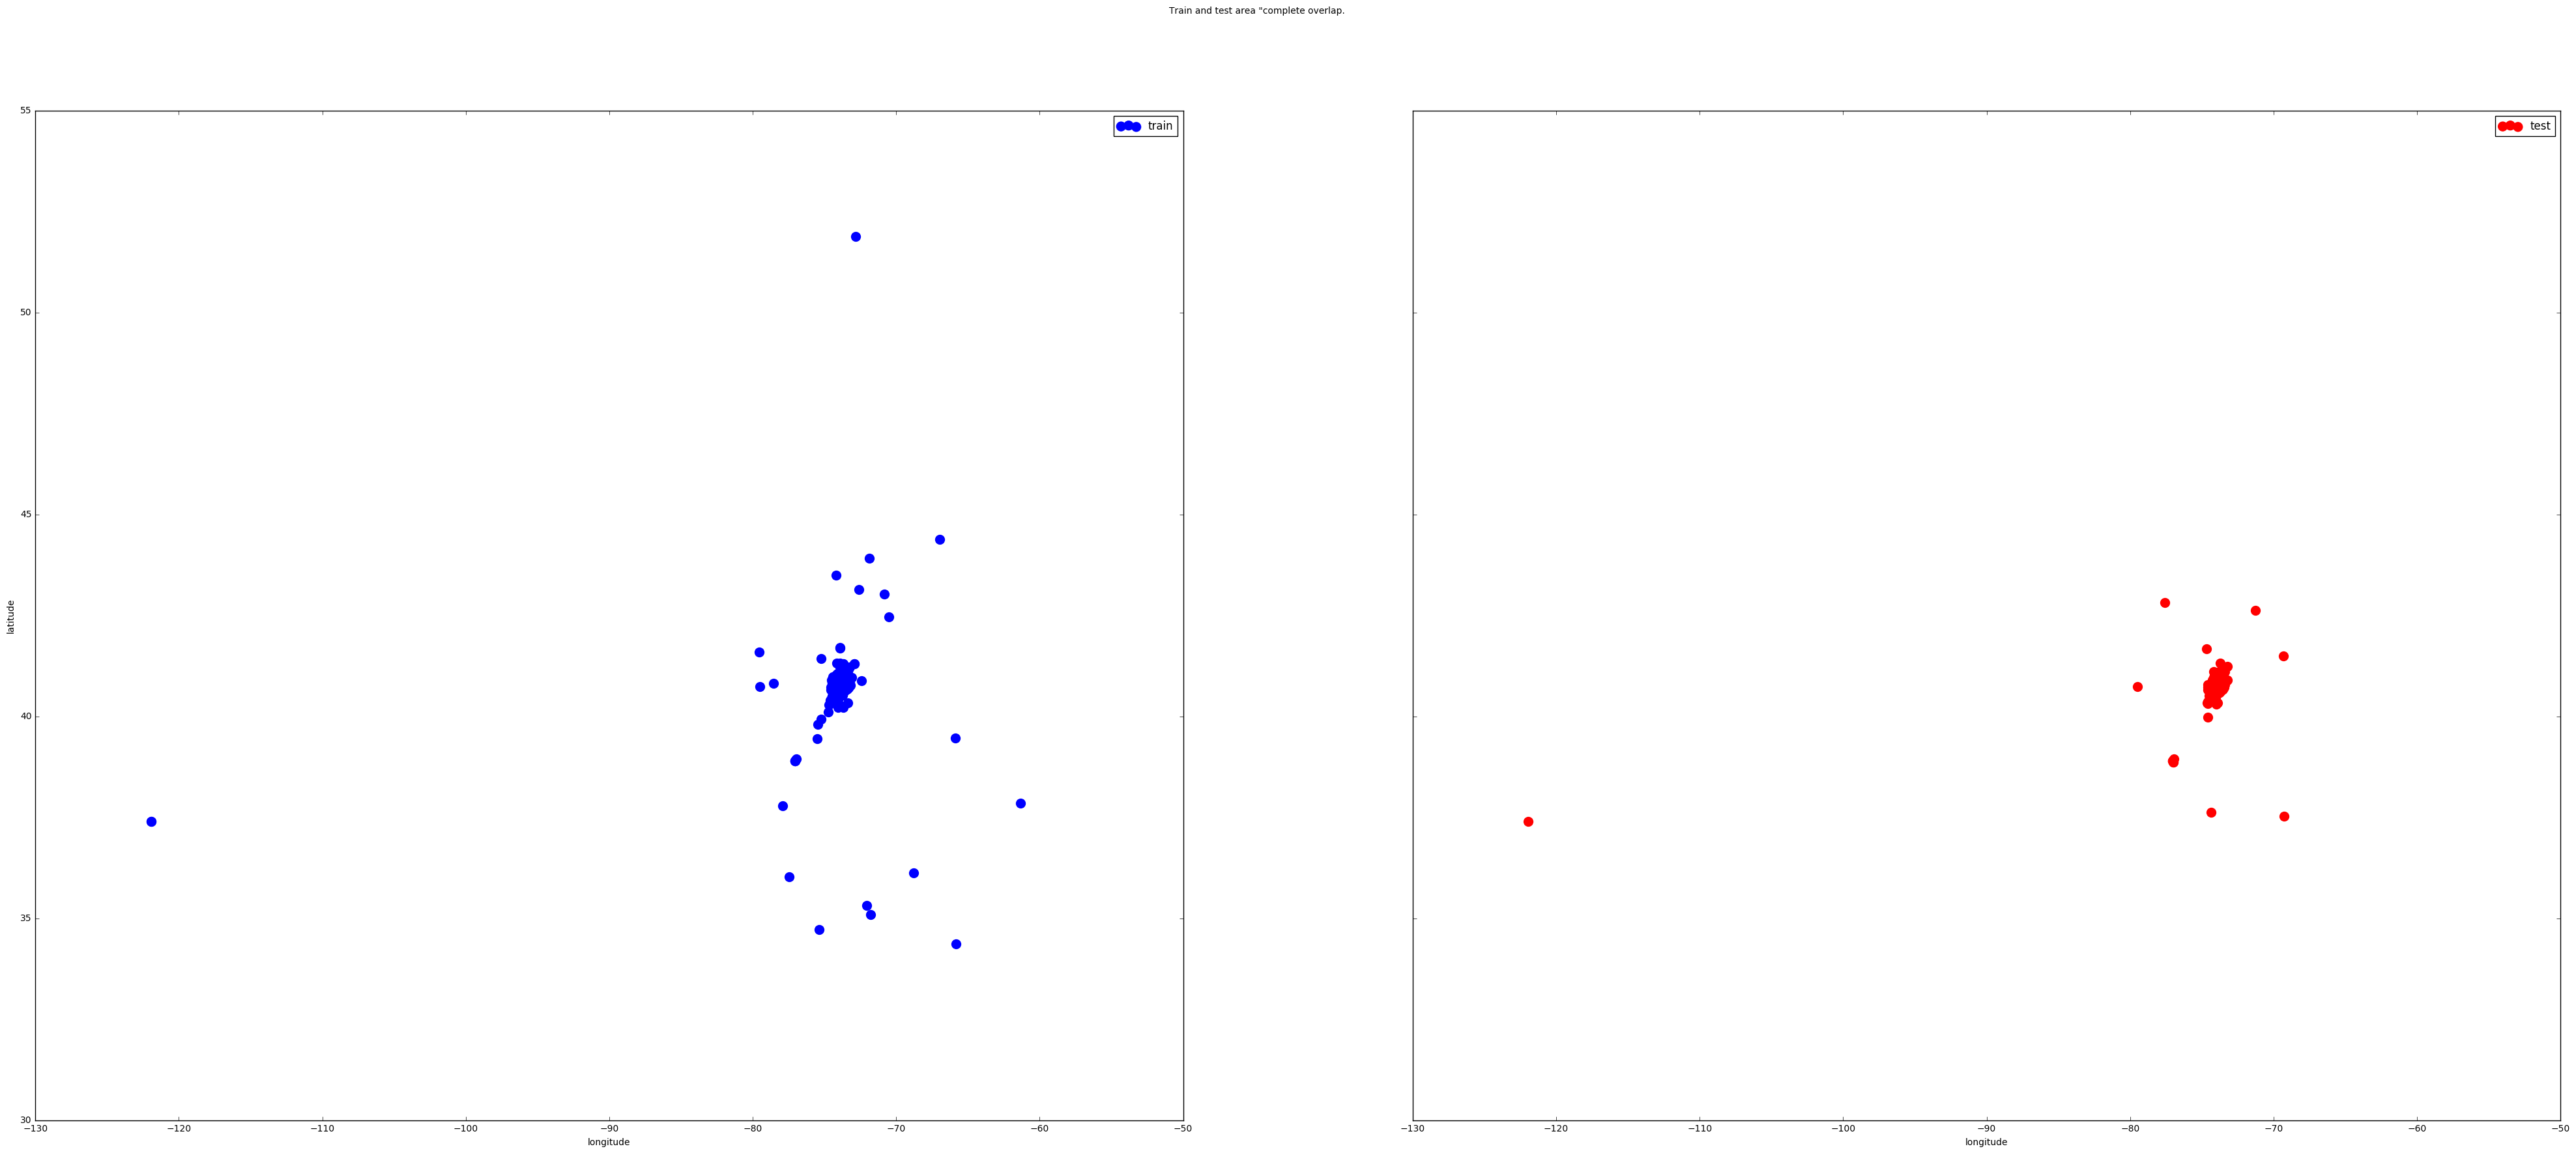

In [3]:

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(50, 20))
ax[0].scatter(train['pickup_longitude'], train['pickup_latitude'],
              color='blue', s=100, label='train', alpha=1)
ax[1].scatter(test['pickup_longitude'], test['pickup_latitude'],
              color='red', s=100, label='test', alpha=1)
fig.suptitle('Train and test area "complete overlap.')
ax[0].legend(loc=0)
ax[0].set_ylabel('latitude')
ax[0].set_xlabel('longitude')
ax[1].set_xlabel('longitude')
ax[1].legend(loc=0)
plt.show()

### 2. Great Circle Distance and Speed

Calculate a great circle distance between pickup location and dropoff location. Create speed columns.

In [ ]:
train['great_circle_distance']=train.apply(lambda row: great_circle((row['pickup_latitude'],row['pickup_longitude']),(row['dropoff_latitude'],row['dropoff_longitude'])).meters,axis=1)
train['speed']=train['distance']/train['trip_duration']*3.6
train['speed_fast_route']=train['distance']/train['duration']*3.6
train['speed_great_circle']=train['great_circle_distance']/train['trip_duration']*3.6

In [ ]:
test['great_circle_distance']=test.apply(lambda row: great_circle((row['pickup_latitude'],row['pickup_longitude']),(row['dropoff_latitude'],row['dropoff_longitude'])).meters,axis=1)

Create a holiday column that indicates the day is a NYC holiday

In [7]:
train['pickup_datetime'] = pd.to_datetime(train.pickup_datetime)
train['pickup_hour'] = train['pickup_datetime'].dt.hour
train['pickup_weekday'] = train['pickup_datetime'].dt.weekday
train['pickup_month']=train['pickup_datetime'].dt.month
train['snow depth']=train['snow depth'].apply(lambda x: float(x) if x!='T' else 0.001)
train['snow']=train['snow depth'].apply(lambda x: 1 if x>0.01 else 0)

train['pickup_date']=train['pickup_datetime'].dt.date

AttributeError: 'list' object has no attribute '__module__'

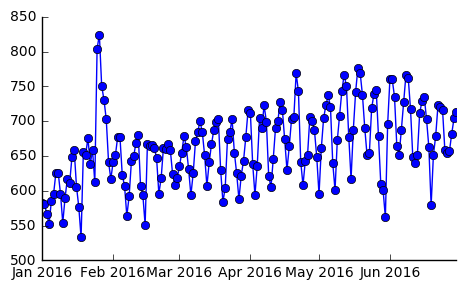

In [26]:
week=[0,1,2,3,4,5,6]
fg = sns.FacetGrid(data=train, hue='pickup_weekday',hue_order=week, aspect=1.61)
fg.map(plt.plot(train.groupby('pickup_date').median()[['trip_duration']], 'o-')).add_legend()

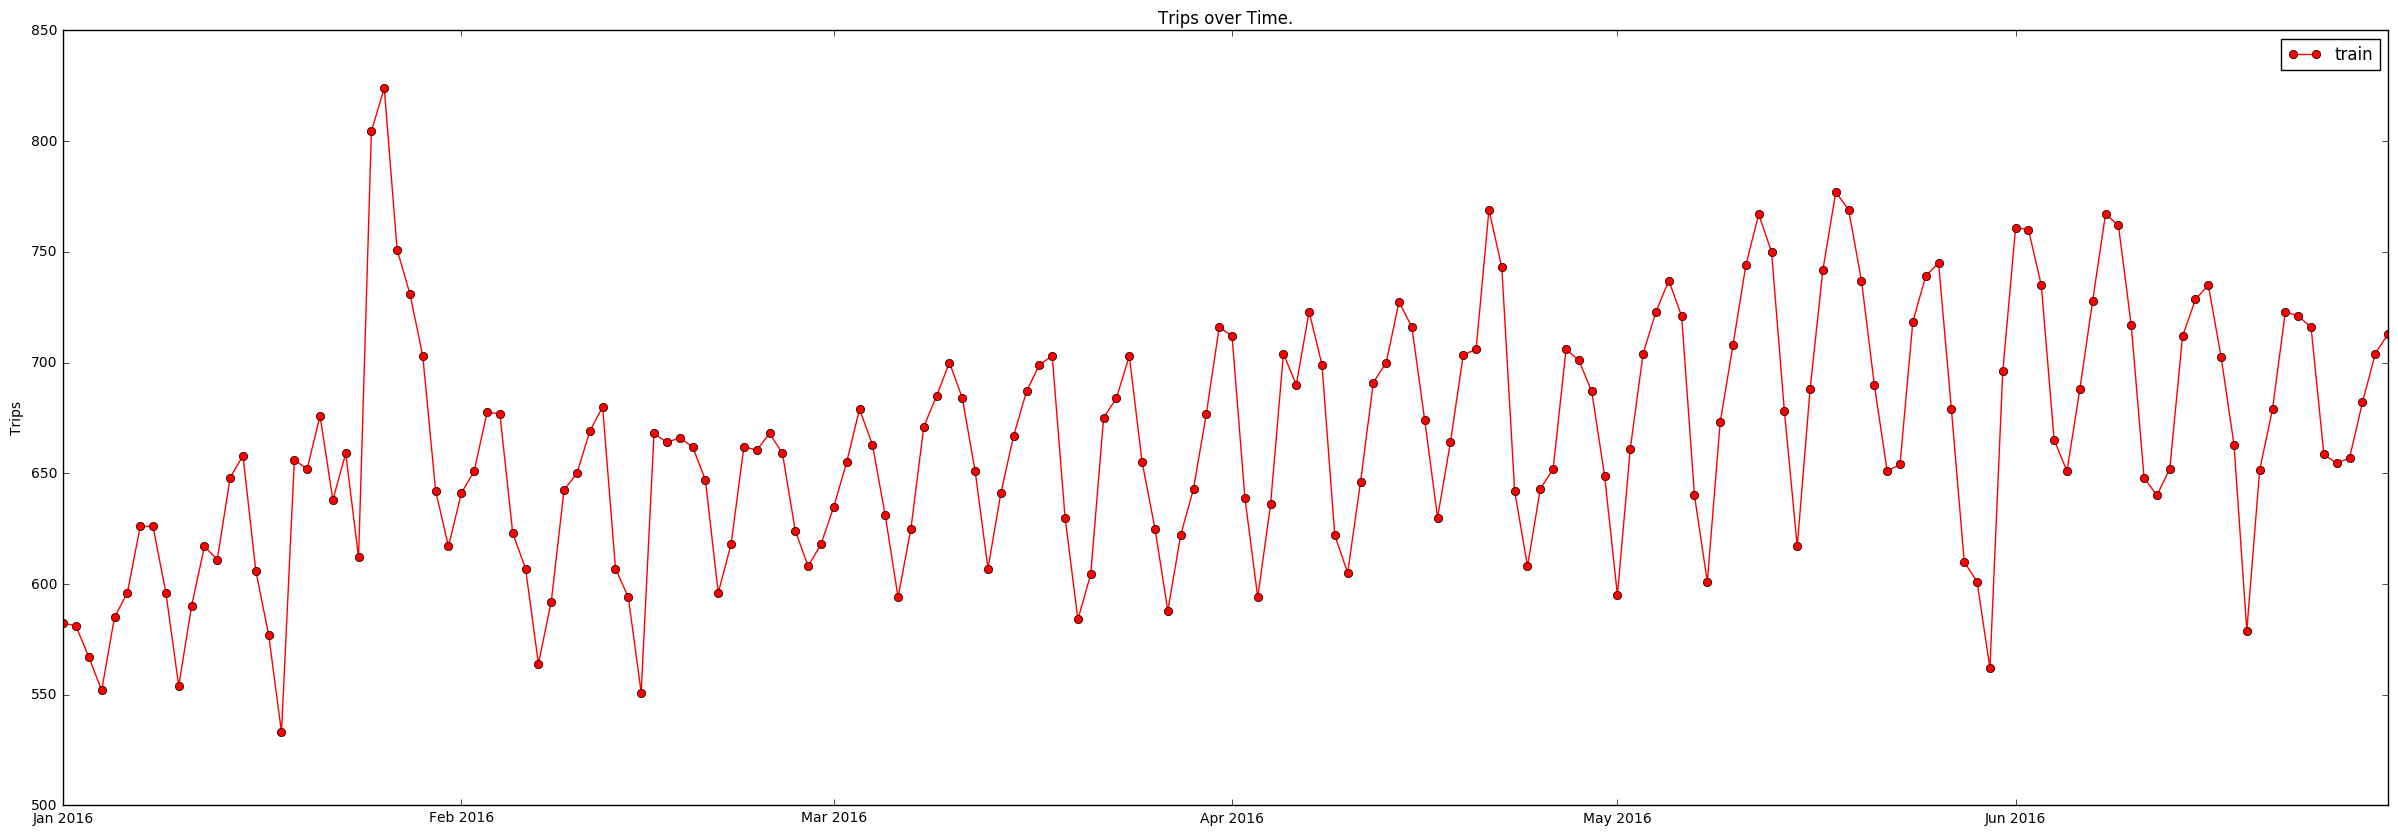

In [19]:

plt.figure(1, figsize=(30, 10))

plt.plot(train.groupby('pickup_date').median()[['trip_duration']], 'o-', label='train',color='red')
plt.title('Trips over Time.')
plt.legend(loc=0)
plt.ylabel('Trips')
plt.show()

In [ ]:
def holiday(x):
    x1=x.date()
    if x1 in (datetime.date(2016,1,1),datetime.date(2016,1,2),datetime.date(2016,1,4),datetime.date(2016,1,18),datetime.date(2016,2,15),datetime.date(2016,5,30),datetime.date(2016,5,28),datetime.date(2016,6,19)):
        return 1
    else:
        return 0